# (Boostcourse) 프로젝트로 배우는 scikit-learn - EDA, Feature Engineering

# Pima people

## 데이터 구성

- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure: 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께(mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI: 체질량 지수 (체중kg / 키(m^2))
- DiabetesPedigreeFunction : 당노병 혈통 기능
- Age : 나이
- Outcome: 768개 결과 중 268개의 결과 클래스 변수 (0,1)

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [109]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [110]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [112]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [113]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 결측치 시각화

<AxesSubplot:>

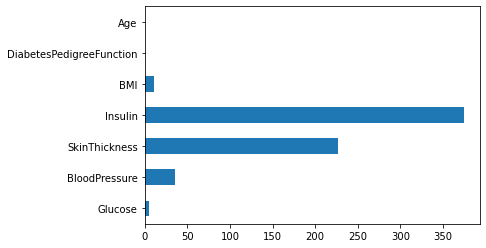

In [114]:
df_null = df.iloc[:,1:-1].replace(0, np.nan)
df_null.isnull().sum().plot.barh()

In [115]:
df_null.isnull().mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

0 값을 결측치라 가정하고 정답(label, target) 값을 제외한 칼럼에 대해 결측이 여부를 구해 df_null이라는 데이터프레임에 담습니다.

<AxesSubplot:>

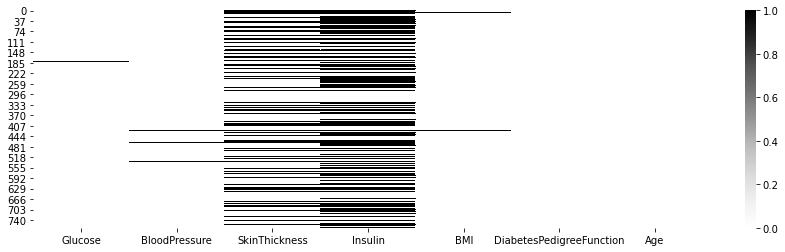

In [116]:
plt.figure(figsize = (15,4))
sns.heatmap(df_null.isnull(), cmap = 'Greys')

### Target : Outcome

In [117]:
pd.DataFrame(df['Outcome'].value_counts())

,Outcome
0,500
1,268


In [118]:
pd.DataFrame(df['Outcome'].value_counts(normalize = True))

,Outcome
0,0.651042
1,0.348958


normalize = True 옵션을 통해 비율을 확인해봄.

In [119]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape

((500, 9), (268, 9))

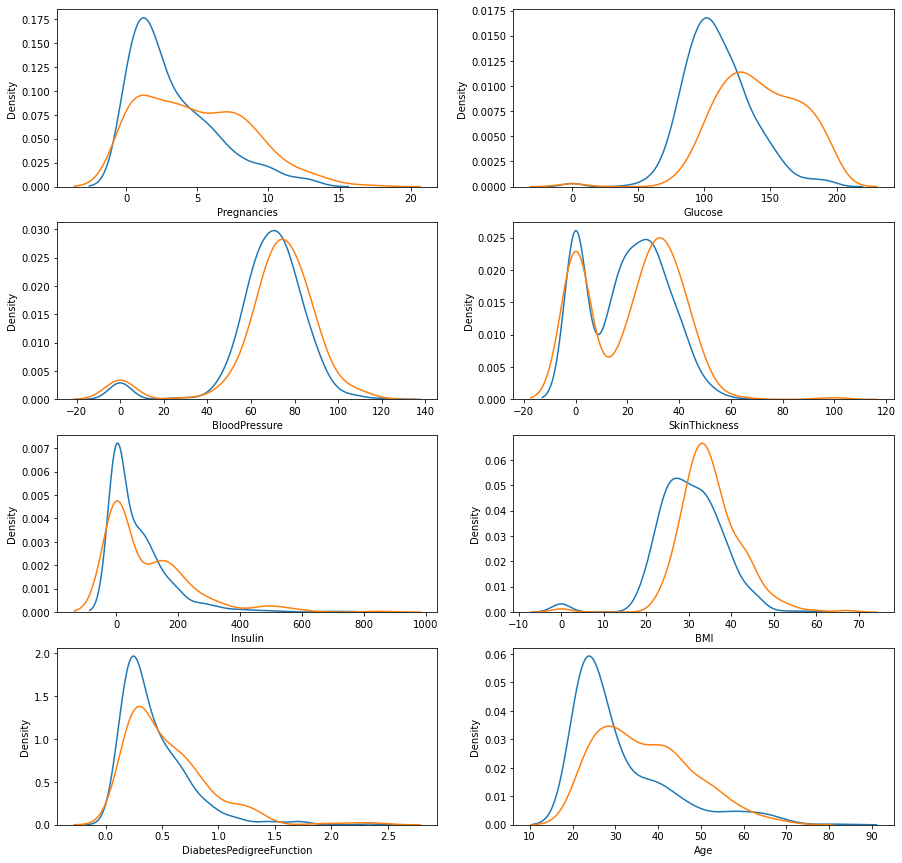

In [120]:
fig, axes = plt.subplots(nrows=4, ncols = 2, figsize = (15,15))

for i, col_name in enumerate(df.iloc[:,:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax = axes[row,col], label = 0, hist = False)
    sns.distplot(df_1[col_name], ax = axes[row,col], label = 1, hist = False)
plt.show()

Pregnancies는 범주가 너무 많기 때문에 오버피팅의 문제가 발생할 수 있다.  5를 기준으로 범주화 시키는게 좋음

Age도 30세 이후로 발병하는 횟수가 증가함을 볼 수 있다. 30세 이전과 이후로 범주화 하면 좋을 것 같다.

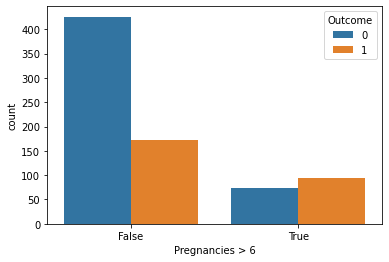

In [121]:
df['Pregnancies_high'] = df['Pregnancies'] > 6

sns.countplot(data = df, x = 'Pregnancies_high', hue = 'Outcome')
plt.xlabel('Pregnancies > 6')
plt.show()

임신횟수가 많을수록 당뇨에 걸릴 확률은 높지만 전체적인 수는 적다.

#### Pandas를 이용한 histplot 그리기

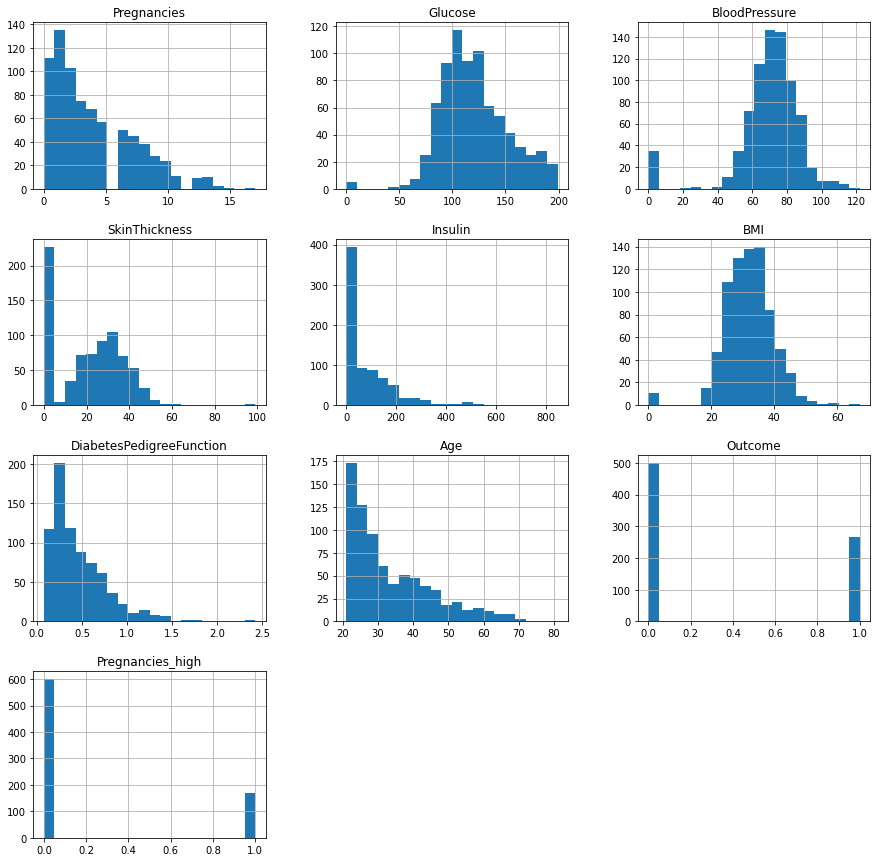

In [122]:
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
h = df.hist(figsize = (15,15), bins = 20)

### 상관계수

In [123]:
df_matrix = df_null
df_matrix[['Pregnancies','Outcome']] = df[['Pregnancies','Outcome']]
df_corr = df_matrix.corr()

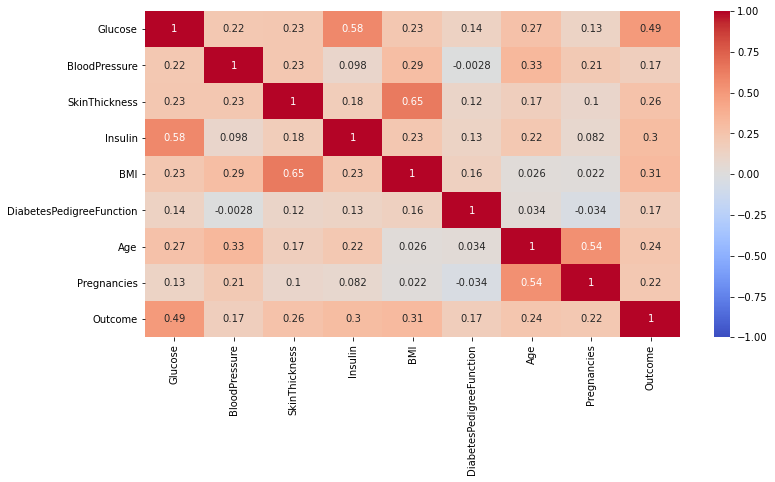

In [124]:
plt.figure(figsize = (12,6))
sns.heatmap(df_corr, vmax = 1, vmin = -1, cmap = 'coolwarm', annot = True)
plt.show()

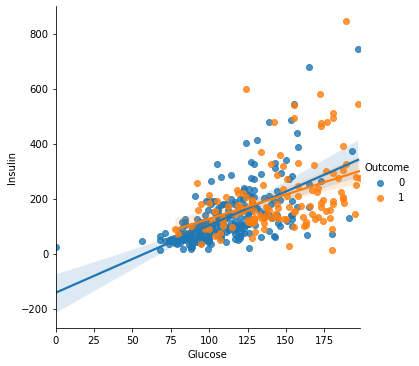

In [126]:
sns.lmplot(data = df[df['Insulin'] > 0], x = 'Glucose', y = 'Insulin',hue = 'Outcome')

Insulin > 0 이상인 데이터로 Insulin과 Glucose의 관계를 보았다.

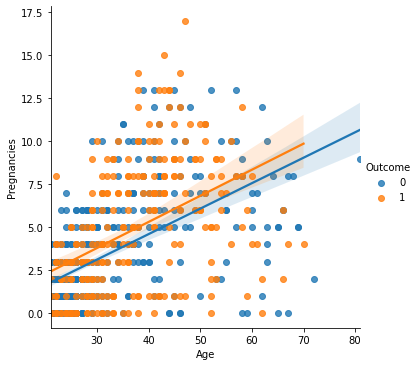

In [127]:
sns.lmplot(data = df, x = 'Age', y = 'Pregnancies', hue = 'Outcome')

# Feature Engineering

### 결측치 대체

In [70]:
df.groupby('Outcome')['Insulin'].agg(['mean', 'median'])

,mean,median
Outcome,,
0,130.287879,102.5
1,206.846154,169.5


In [71]:
df_null['Insulin'].fillna(df.groupby('Outcome')['Insulin'].transform('median'), inplace = True)

In [72]:
df_null.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Pregnancies                   0
Outcome                       0
dtype: int64

### 수치형 데이터를 범주형 데이터로 변환

<AxesSubplot:xlabel='Insulin_log', ylabel='Density'>

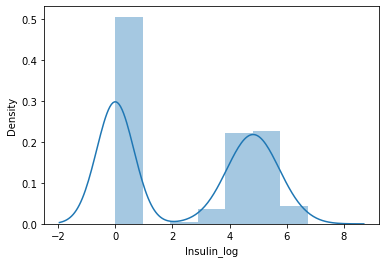

In [98]:
df_null['Insulin_log'] = np.log(df['Insulin'] +1)
sns.distplot(df["Insulin_log"])

log 변환을 통해 정규분포와 근사하게 만들어준다.

 log는 작으면 음수값을 띄므로 +1을 해준다.

###  상관계수 분석을 통해 파생변수 생성

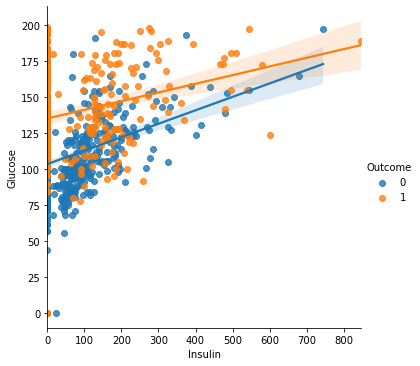

In [86]:
sns.lmplot(data = df, x = 'Insulin', y = 'Glucose', hue = 'Outcome')

In [92]:
df_null['low_glu_insulin'] =(df_null['Glucose'] < 100) & (df_null['Insulin'] <= 102.5)

pd.crosstab(df_null['Outcome'], df_null['low_glu_insulin'])

low_glu_insulin,False,True
Outcome,,
0,335,165
1,257,11


In [93]:
df_null['low_glu_insulin'].replace({False : 0, True :1}, inplace = True)
df_null.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome,low_glu_insulin
0,148.0,72.0,35.000000,0.0,33.6,0.627,50,6,1,0
1,85.0,66.0,29.000000,39.0,26.6,0.351,31,1,0,1
2,183.0,64.0,22.164179,0.0,23.3,0.672,32,8,1,0
3,89.0,66.0,23.000000,94.0,28.1,0.167,21,1,0,1
4,137.0,40.0,35.000000,168.0,43.1,2.288,33,0,1,0


### 이상치 나누기

<AxesSubplot:xlabel='Insulin'>

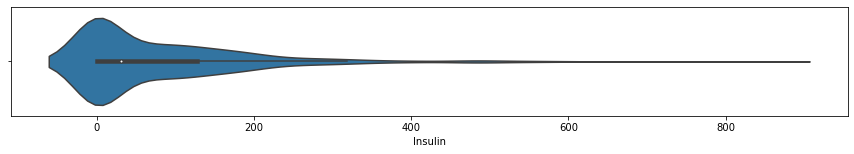

In [89]:
plt.figure(figsize = (15,2))
sns.violinplot(df['Insulin'])

In [90]:
df["Insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [91]:
#Out = IQR3 + (1.5 * IQR)
df_low_insulin = df_null[df_null['Insulin'] < 600]
df_low_insulin

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.000000,0.0,33.6,0.627,50,6,1
1,85.0,66.0,29.000000,39.0,26.6,0.351,31,1,0
2,183.0,64.0,22.164179,0.0,23.3,0.672,32,8,1
3,89.0,66.0,23.000000,94.0,28.1,0.167,21,1,0
4,137.0,40.0,35.000000,168.0,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.000000,180.0,32.9,0.171,63,10,0
764,122.0,70.0,27.000000,39.0,36.8,0.340,27,2,0
765,121.0,72.0,23.000000,112.0,26.2,0.245,30,5,0
766,126.0,60.0,22.164179,0.0,30.1,0.349,47,1,1


이상치는 51개이다. 

많기 때문에 인슐린 수치가 600이 넘는 값을 제거하는 것이 나을 것이다.

### Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df[['Glucose', 'DiabetesPedigreeFunction']])

scale = scaler.transform(df[['Glucose', 'DiabetesPedigreeFunction']])

scale

df[['Glucose', 'DiabetesPedigreeFunction']] = scale

df[['Glucose', 'DiabetesPedigreeFunction']].hist()

## 모델링

In [100]:
from sklearn.model_selection import train_test_split

X = df
X = X.drop(['Outcome', 'Pregnancies', 'Insulin'], axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10 )

print('train 데이터 개수: ', X_train.shape)
print('test 데이터 개수: ', X_test.shape)

train 데이터 개수:  (537, 9)
test 데이터 개수:  (231, 9)


In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier()

model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [102]:
plt.figure(figsize = (20,20))
tree = plot_tree(model, fontsize = 10, filled = True)

Error in callback <function flush_figures at 0x000001C760FFF708> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:>

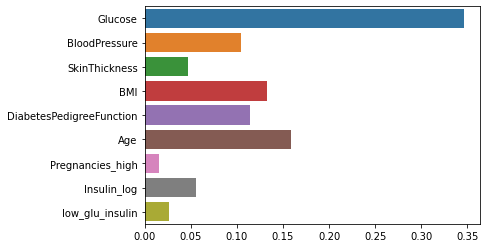

In [103]:
model.feature_importances_

sns.barplot(x = model.feature_importances_, y = X_train.columns)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

tree_matrix = metrics.confusion_matrix(y_test, y_predict)
pd.DataFrame(tree_matrix)

In [ ]:
tree_report = metrics.classification_report(y_test, y_predict)
print(tree_report)